<a href="https://colab.research.google.com/github/rlaqhalx/machine_learning_study/blob/main/MLP_Deep_learning_image_classification_for_Sign_Language_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sign Language MNIST Image Classfication using Deep Neural Networks, MLP



# Downloading Dataset
English alphabet sign language dataset

https://www.kaggle.com/datamunge/sign-language-mnist

In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Importing Libaray

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Loading dataset

Train & Test set

In [ ]:
train_df = pd.read_csv('sign_mnist_train.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test_df = pd.read_csv('sign_mnist_test.csv')

test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


# Label Distribution
- Exclude 9=J and 25=Z because they involve actions.
- There are a total of 24 labels.

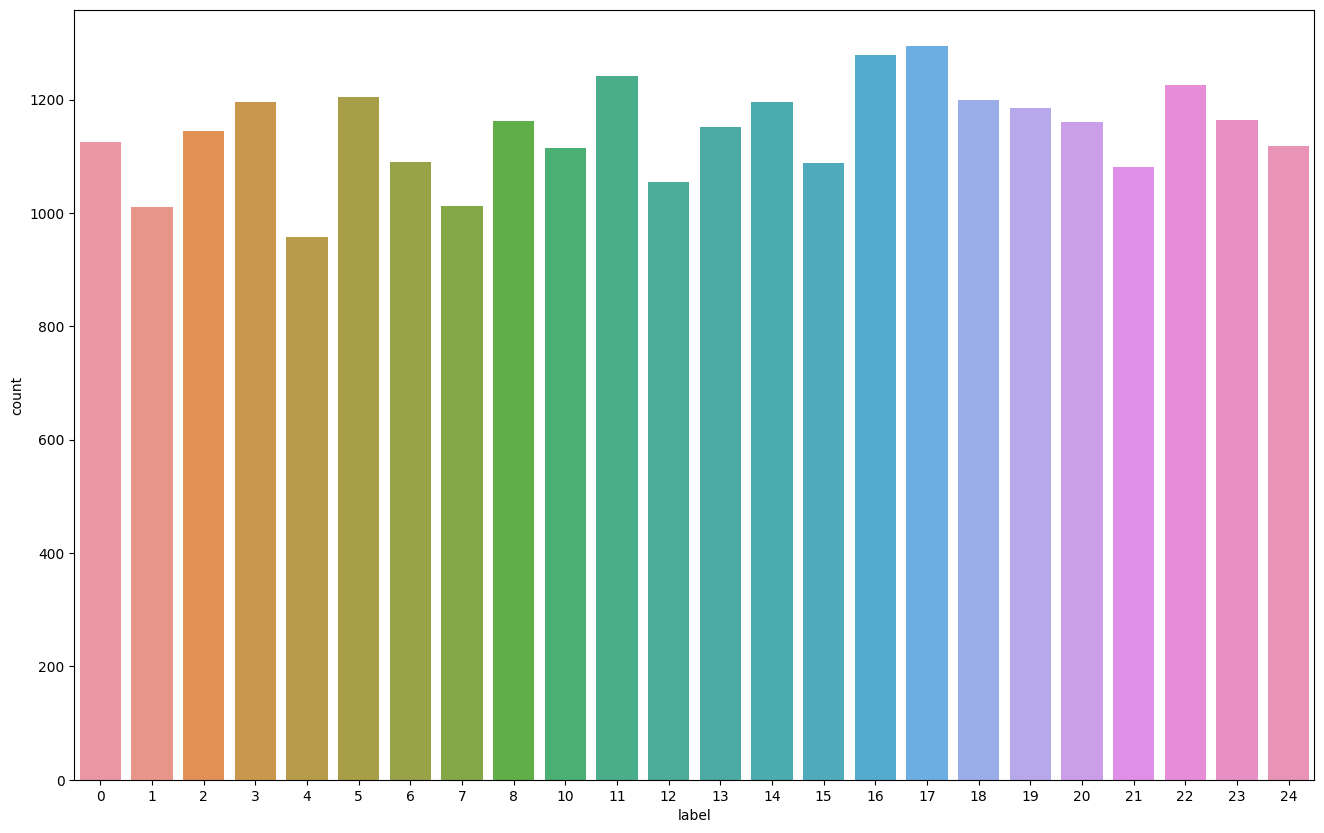

In [ ]:
plt.figure(figsize=(16, 10))
sns.countplot(x='label', data=train_df)
plt.show()

# Data preprocessing

## Divide dataset into x (input) & y (output)

You can change x_train, x_test, y_train, and y_test from dataframe to NumPy array for some plt functions (plt.imshow) unlike plt.plot() or plt.scatter().
```
train_df = train_df.astype(np.float32)
x_train = train_df.drop(columns=['label'], axis=1).values
y_train = train_df[['label']].values

test_df = test_df.astype(np.float32)
x_test = test_df.drop(columns=['label'], axis=1).values
y_test = test_df[['label']].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)```



In [ ]:
train_df = train_df.astype(np.float32)
x_train = train_df.drop(columns=['label'], axis=1)
y_train = train_df[['label']]

test_df = test_df.astype(np.float32)
x_test = test_df.drop(columns=['label'], axis=1)
y_test = test_df[['label']]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(27455, 784) (27455, 1)
(7172, 784) (7172, 1)


## Preview of data

Use below if you changed to NumPy array using .values in previous code

```
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28, 28)), cmap='gray')
plt.show()
```



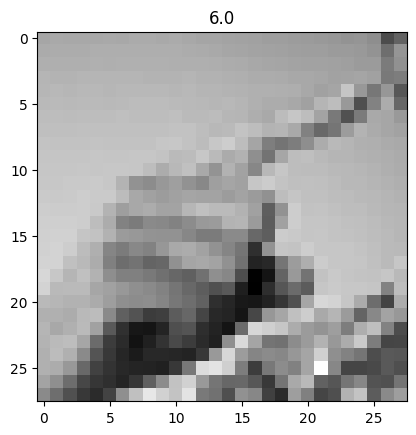

In [ ]:
index = 1
plt.title(str(y_train.iloc[index, 0]))  # label
plt.imshow(x_train.iloc[index].values.reshape((28, 28)), cmap='gray')  # Using .values to access the NumPy array
plt.show()

## One-hot encoding

One-hot encoding for Output (label or y value)

In [ ]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

print(y_train.shape)

(27455, 24)


## Normalization
Image data consists of pixels represented as integers ranging from 0 to 255 (unsigned integer 8-bit = uint8). I'll divide this by 255 to convert it into floating-point data ranging from 0 to 1 (floating point 32-bit = float32) and normalize it.

Normalization for input (x value)

![image.png](https://www.wallstreetmojo.com/wp-content/uploads/2023/05/Normalization-Formula-2.png.webp)

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

# Network Architecture

28 pixels * 28 pixels for one image per label
=> 784 (input)

This means that input would have 784 neurons.

I created three hidden layers with 1024, 512, and 256 neurons and I have used **relu** for activation functions.

For output, 24 label or alphabet (excluding J and Z) would be number of output unit and I haved used **Softmax** since it is multi-label classificiation

*if binary classfication, use 'sigmoid' for output layer's activation function*

In [ ]:
input = Input(shape=(784,))
hidden = Dense(1024, activation='relu')(input)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(256, activation='relu')(hidden)
output = Dense(24, activation='softmax')(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 24)                6168      
                                                                 
Total params: 1466136 (5.59 MB)
Trainable params: 1466136 (5.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training model

In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=20
)

Epoch 1/20
858/858 [==============================] - 7s 5ms/step - loss: 1.6990 - acc: 0.4444 - val_loss: 1.2177 - val_acc: 0.5761
Epoch 2/20
858/858 [==============================] - 4s 5ms/step - loss: 0.6162 - acc: 0.7835 - val_loss: 1.0228 - val_acc: 0.6827
Epoch 3/20
858/858 [==============================] - 4s 5ms/step - loss: 0.2830 - acc: 0.9036 - val_loss: 1.0224 - val_acc: 0.7098
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 0.1730 - acc: 0.9432 - val_loss: 0.9458 - val_acc: 0.7663
Epoch 5/20
858/858 [==============================] - 4s 5ms/step - loss: 0.0938 - acc: 0.9702 - val_loss: 1.2007 - val_acc: 0.7613
Epoch 6/20
858/858 [==============================] - 4s 5ms/step - loss: 0.1082 - acc: 0.9646 - val_loss: 1.2317 - val_acc: 0.7606
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0754 - acc: 0.9753 - val_loss: 0.8967 - val_acc: 0.8219
Epoch 8/20
858/858 [==============================] - 4s 4ms/step - loss: 0.

# Training Result Graph


Text(0.5, 1.0, 'Training and Validation Loss')

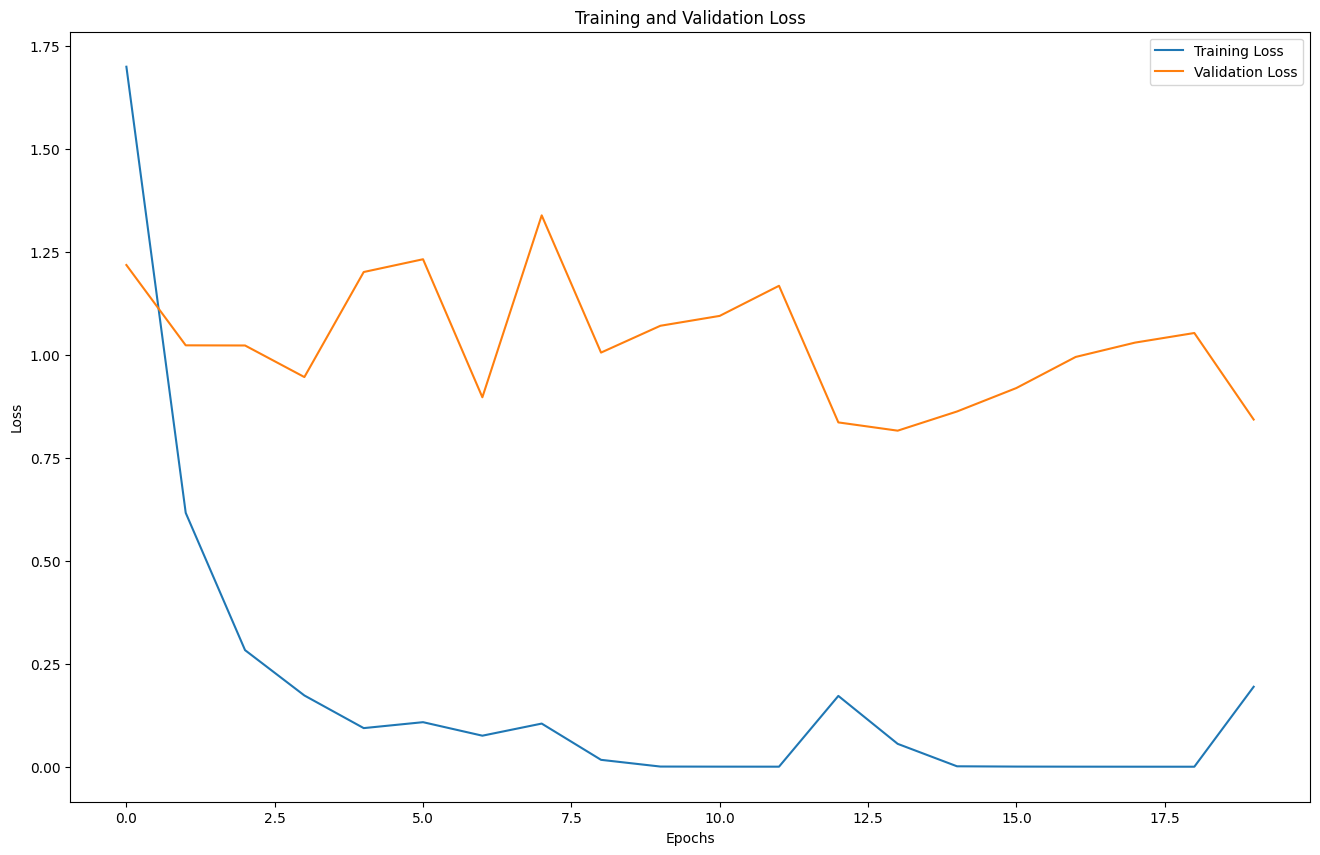

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

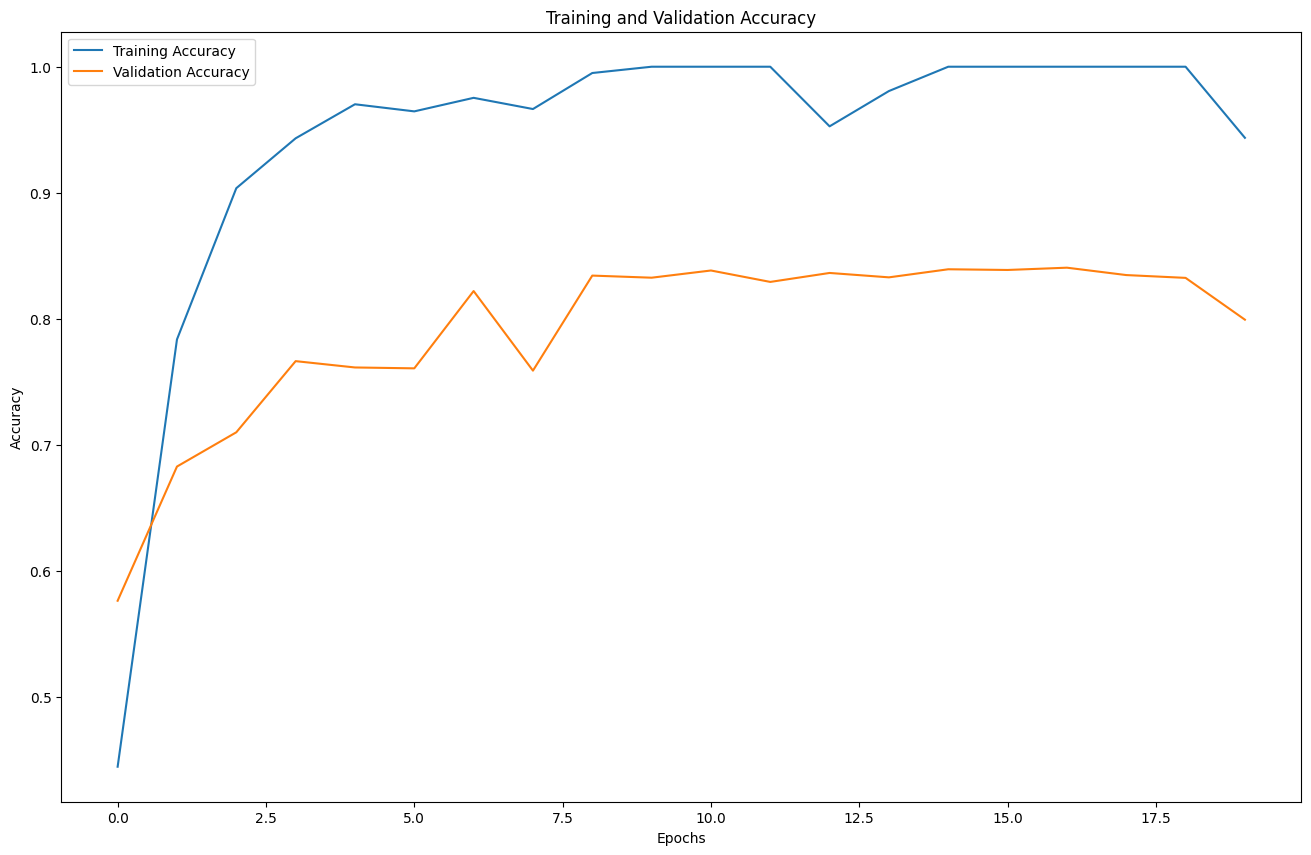

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')

plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')